<a href="https://colab.research.google.com/github/knalin55/Object-Detection-and-Marking/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


import os
import numpy as np 
import PIL
from PIL import Image
from keras.utils import to_categorical
from keras.optimizers import SGD
import random    
import keras
from keras.layers                   import Layer, UpSampling2D, MaxPooling2D, ReLU, Activation, Conv2D,MaxPooling2D, Softmax, Concatenate, Input, Flatten, Dense, Convolution2D, BatchNormalization, Activation, Reshape,Conv2D
from keras.models                   import Model, load_model, save_model
from keras.regularizers             import l2
#from keras_adabound                 import AdaBound
import keras.backend                as K
from keras.models import load_model

from skimage.feature import match_template
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import skimage
import PIL
from PIL import Image
import sys 
import cv2
from numpy import reshape
from keras.models import load_model
from PIL import Image
import numpy as np
import math

# How computer interpret image

In [ ]:
#Reading image with openCV
im = cv2.imread('1.jpg')
print("This is how computer sees image")
#just matrix of pixel values. So value of each pixelis a three element matrix
# each representing value of Blue, Green and Red (The primary colours). 
#These colour value can range from 0 to 255.
print("Shape of matrix is " +str(im.shape))
print(im)

This is how computer sees image
Shape of matrix is (393, 590, 3)
[[[115  64   2]
  [117  75  10]
  [101  74   7]
  ...
  [103  68   4]
  [102  67   3]
  [100  65   1]]

 [[109  61  13]
  [100  60  11]
  [ 82  58   4]
  ...
  [102  65   3]
  [102  63   1]
  [ 99  62   0]]

 [[ 85  43  24]
  [ 67  33  10]
  [ 50  31   4]
  ...
  [108  64   5]
  [107  61   3]
  [105  61   2]]

 ...

 [[ 93  56   0]
  [100  60   1]
  [108  67   5]
  ...
  [107  66   3]
  [117  74  11]
  [122  81  18]]

 [[102  65   5]
  [102  63   1]
  [103  62   0]
  ...
  [116  73  10]
  [120  77  14]
  [130  87  24]]

 [[113  74  12]
  [105  66   4]
  [116  75  13]
  ...
  [ 90  47   0]
  [106  62   1]
  [103  59   0]]]


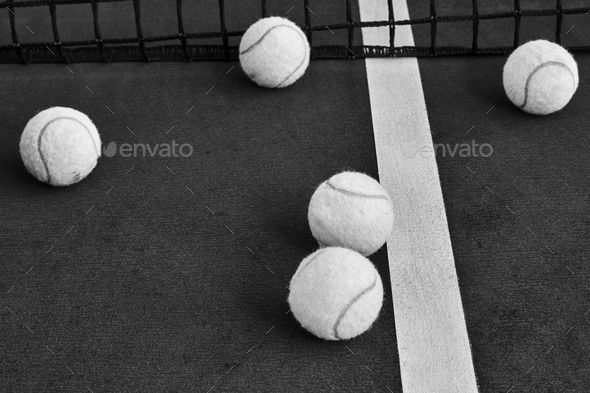

[[51 60 57 ... 53 52 50]
 [52 50 45 ... 51 49 48]
 [42 30 25 ... 51 49 48]
 ...
 [43 47 53 ... 52 60 67]
 [51 49 48 ... 59 63 73]
 [60 52 61 ... 38 49 46]]


In [ ]:
#Changing Clourful image to Gray image just to make pixel values single element instead of three values(BGR)
#To get this single value we use Gray = 0.114 * Blue + 0.299 * Red + 0.587 * Green
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgray)
print(imgray)

# Some methods for Object Counting without Neural Network

Possible way to count balls in image can be using edge-detection based object detction methods like Contour creation or Hough transform  

57


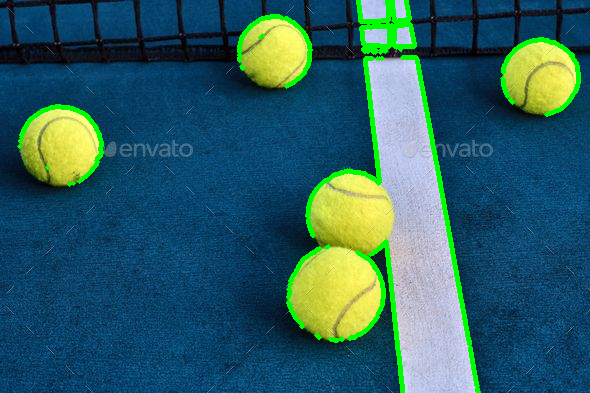

In [ ]:
output = im.copy()
edges= cv2.Canny(imgray, 500,500)
ret, thresh = cv2.threshold(edges, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(output, contours, -1, (0,255,0), 3)
print(len(contours))
cv2_imshow(output)

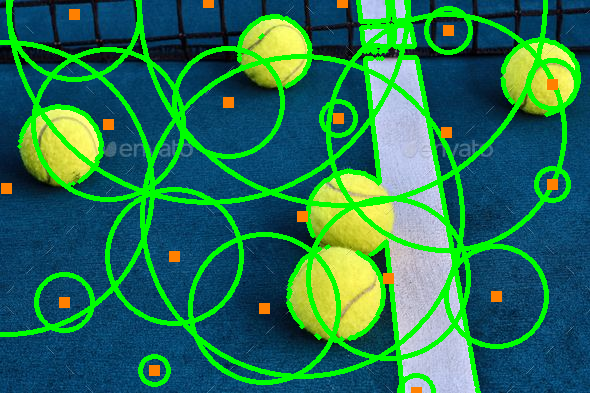

19


In [ ]:
# detect circles in the image
#circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 1.2, 100)

# Blur using 3 * 3 kernel. 
#gray_blurred = cv2.blur(imgray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 0.2, 100,\
                                    param1 = 50,param2 = 30, minRadius = 0, maxRadius = 0) 


# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	cv2_imshow(output)
print(len(circles))

Please tell for which of the following images balls can be counted using these methods.

# **Object counting with Neural Network**

Then what other option we have then train a neural network. 

In [ ]:
#Sequentially made CNN model.

input1= Input((20,20,3))


conv1  = Conv2D(32, (2,2), padding='same')(input1)
bn1    = BatchNormalization()(conv1)
act1   = ReLU()(bn1)

conv2  = Conv2D(32, (3,3), padding='same')(input1)
bn2    = BatchNormalization()(conv2)
act2   = Activation('sigmoid')(bn2)

conv   = Conv2D(32, (2,2), padding='same')(act2)
bn     = BatchNormalization()(conv)
act    = Activation('relu')(bn)

concat = Concatenate(axis=-1)([act1, act])

conv   = Conv2D(32, (2,2))(concat)
bn     = BatchNormalization()(conv)
act    = Activation('relu')(bn)
maxp   = MaxPooling2D((2,2))(act)

conv   = Conv2D(32, (3,3))(maxp)
bn     = BatchNormalization()(conv)
act    = Activation('relu')(bn)
maxp   = MaxPooling2D((2,2))(act)

up    = UpSampling2D((2,2), interpolation='nearest')(maxp)
conv  = Conv2D(32, (3,3))(up)
bn    = BatchNormalization()(conv)
act   = Activation('sigmoid')(bn)

up    = UpSampling2D((2,2), interpolation='nearest')(act)
conv  = Conv2D(32, (3,3))(up)
bn    = BatchNormalization()(conv)
act   = ReLU()(bn)
 
conv  = Conv2D(32, (3,3))(act)
bn    = BatchNormalization()(conv)
act   = ReLU()(bn)
maxp  = MaxPooling2D((2,2))(act)


at  = Flatten()(maxp)
dense = Dense(128, activation='sigmoid')(at)
drop  = Dropout(0.5)(dense)
out   = Dense(2, activation='softmax')(drop)


model = Model(inputs= input1, outputs= out)

model.summary()

sgd= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])



NameError: ignored

# HOW WE CREATE DATASET FOR TRAINING

We manually crop diameter*diameter enclosing individual ball's circular ends such that center of circle(ball) and  square(window) coincide approximately. In case of partially visible balls one just try to coincide it's center with window's even if another rod is getting inside window. Save this data in a folder.

 Saving diameter*diameter cropped image from original image by shifting window by 2 pixel each time (given the restriction that the image is not present in the manually cropped images folder). Here this 2 is of no  particular concern, we are trying to create large dataset while covering whole image. A dictionary is also created with image names as keys and label 0.

In [ ]:
irectory = "data/label_1" #Location of folder where we kept the manually cropped images.
path1 = "data/label_0" #Location of folder where we will save our label '0' images

labels={}

n=0
count=0

for i in range(np.int64((im.size[0]- 20)/2) + 1):
    for k in range(np.int64((im.size[1] - 20)/2) + 1):
        count  = 0
        x      = ""
        y      = ""
        left   = 2*i
        right  = 2*i + 20
        top    = 2*k
        bottom = 2*k + 20 
        m      = im.crop((left, top, right, bottom))

        for files in os.listdir(directory): #Here we check whether there is any common image in data crated manually and image created above code, if there is, then we don't save it in the folder where we are saving our label '0' images. 
            file = Image.open(os.path.join(directory,files))
            if np.array_equal(np.asarray(m), np.asarray(file)):
                break
            else:
                count=count+1
                
        if count == 416: #Here, 416 is the number of label '1' images we got while manually cropping. 
            x         = x.join(['1_', str(n)]) #The images would be saved as 1_1.jpg, 1_2.jpg,... . Here, '1_' is insignificant. 
            labels[x] = '0'
            y         = y.join([x, '.jpg'])
            m         = m.save(os.path.join(path1, y))
            n         = n+1

num_lab_0=n-1   #We will need this number in generating the training dataset 

Data created maually is labelled 1, but it is too less compared to data labelled 0. So, what can we do solve this class imbalance?

In [ ]:
#So we rotate and transpose manually created data to make new data with label 1 which is 7 times manually created data.

for files in os.listdir(directory):
    file = Image.open(os.path.join(directory,files))
    file_t = file.transpose(Image.FLIP_LEFT_RIGHT) 
    for i in range(4):
        x = ""
        p = ""
        x = x.join(["1_", str(n)])
        p = p.join([x, '.jpg'])
        rot = file.rotate(90*i)
        labels[x]='1'
        rot = rot.save(os.path.join(path1,p))
        n=n+1
    for i in range(4):
        x = ""
        p = ""
        x = x.join(["1_", str(n)])
        p = p.join([x, '.jpg'])
        rot = file_t.rotate(90*i)
        labels[x]='1'
        rot = rot.save(os.path.join(path1,p))
        n=n+1
    

Still data with label 0 is too large compared to the data with label 1. Should we randomly choose from label 0 data to make their ratio comparable (that is 1:3). 

In [ ]:
#But we don't want to miss the surrounding images of label 1 data for better learning, 
#hence we do the choosing after every two epoch.

for j in range(15):
    lis = random.choices(range(num_lab_0), k=10000)
    for i in range(num_lab_0, n):
        lis.append(i)
    lis = random.sample(lis, len(lis))
    image_train = np.zeros((len(lis), 20, 20, 3))
    lab         = np.zeros((len(lis), 1))
    i=0
    for keys in lis:
        a              = ""
        b              = ""
        a              = a.join(["1_", str(keys), ".jpg"])
        b              = b.join(["1_", str(keys)])
        path_im        = os.path.join(path1, a)
        img_t          = Image.open(path_im)
        image_train[i] = img_t
        lab[i]         = labels[b]  
        i=i+1
    lab = to_categorical(lab, 2)
    #We take 10% of the training set as validation data
    model.fit(x= image_train , y=lab, epochs=2, verbose=1,  shuffle=True, validation_split= 0.1, batch_size=28) 

In [ ]:
#Saving the trained model

model.save('steel_bar_count.h5')

# Testing the model

In [ ]:
#model path
model = load_model(r'steel_bar_coun.h5')

In [ ]:
def reshape_img(b,x):
    b = b.resize((np.int64(b.size[0]/x), np.int64(b.size[1]/x)))
    left= 0
    right= b.size[0] - (b.size[0]%2)
    top= 0
    bottom= b.size[1] - (b.size[1]%2)
    b= b.crop((left, top, right, bottom))
    return b

In [ ]:
def find_radius(image):
    image = np.asarray(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ab=0
    ba=0
    for thr in range(2, 13):
        _, binary = cv2.threshold(gray, 10*thr + 5, 25, cv2.THRESH_BINARY)
        max1=[]
        ind=0
        for i in range(1,50):
            cir = np.zeros((2*i,2*i))
            circ = cv2.circle(np.asarray(cir), (i,i), radius = i, color=(255, 255), thickness=-1)
            template = circ
            result= match_template(binary, template)
            max1.append(np.amax(result))
        max_l=0
        max_val=0
        ind=0
        for i in range(6):
            max1.remove(max1[0])
            max_val= max(max1)   
            max_l= 7 + max1.index(max_val)    
        if ba <= max_val:
            ba = max_val
            ab = max_l
    radii=ab/ba
    print("radius =", radii)
    return radii

In [ ]:
def find_centres(img):
    radii = find_radius(img)
    x=0
    if radii<7:
        print("Rods are too small to count.")
        print(" Please give nearer image.")
        quit()
    if 7<=radii<=10:
        x=1
    elif 10<radii:
        x= math.ceil(radii/10)
    b= reshape_img(img,x)
    z= []
    x= []
    y= []
    for i in range(np.int64((b.size[0]- 20)/2) + 1):
        for k in range(np.int64((b.size[1] - 20)/2) + 1):
            left   = 2*i
            right  = 2*i + 20
            top    = 2*k
            bottom = 2*k + 20 
            count=0
            m      = b.crop((left, top, right, bottom))
            m= reshape(np.asarray(m), (1,20,20,3))
            pred= model.predict(m)
            if pred[0][1] >= 0.3:
                z.append(pred[0][1])
                x.append(np.int64((left+right)/2))
                y.append(np.int64((top+bottom)/2))
    x1 = np.array(x)
    y1= np.array(y)
    z1= np.array(z)
    x1.resize(len(x),1)
    y1.resize(len(x),1)
    z1.resize(len(x),1)
    xy= np.concatenate([x1,y1,z1], axis=-1)
    xy = xy.tolist()
    for i in range(np.int64((b.size[0] - 8)/2) + 1):
        for k in range(np.int64((b.size[1] - 8)/2) + 1):
            inde=[]
            p=0
            left   = 2*i
            right  = 2*i + 8
            top    = 2*k
            bottom = 2*k + 8 
            yx=[]
            for item in xy:
                if left <= item[0] <= right and top <= item[1] <= bottom:
                    if p >= item[2]:
                        try:
                            xa = xy.index(xy[xy.index(item)])
                        except:
                            break
                        else:
                            xy.remove(xy[xy.index(item)])
                    elif 0 < p < item[2]:
                        try:
                            xa = xy.index(xy[xy.index(yx)])
                        except:
                            break
                        else:
                            xy.remove(xy[xy.index(yx)])
                            p=item[2]
                    else:
                        p=item[2]
                        yx=item
    xy = np.array(xy)
    #marking the centres
    for i in range(len(xy)):
        b = cv2.circle(np.asarray(b), (np.int64(xy[i][0]),np.int64(xy[i][1])), radius = 0, color=(255, 0, 0), thickness=2)
    img = Image.fromarray(b, 'RGB')
    img.show()
    img.save(r'output.jpg')
    print("Number of rods = ", len(xy))

In [ ]:
#image path
img= Image.open(r'test.jpg') 

In [ ]:
find_centres(img)

# Let's see another example of trying to count steel rods stack

In [ ]:
#model path
model = load_model(r'steel_bar_coun.h5')

In [ ]:
#image path
img= Image.open(r'test.jpg')

In [ ]:
find_centres(img)